In [93]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import layers

#Normalização dos anos
ano = np.array([1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])

ano_media = np.mean(ano)
ano_std = np.std(ano)
ano_normalizado = (ano - ano_media)/ano_std

#Dados disponíveis para pesca artesanal
anos_com_dados = np.delete(ano, [12,13,14,15,16,38])

anos_com_dados_norm = np.delete(ano_normalizado, [12,13,14,15,16,38])


pesca_art = np.array([106,175,335,373,127,140,209,176,114,198,112,146,389.5,36.5,104,12.5,127.5,14,184.5,88.5,86.5,101,106.5,122.5,72.5,17.560,34.530,10.680,20.593,8.878,9.596,209.839,2.517,56.960,33.903,41.964,29.422,56.820,63.434])

pa_media = np.mean(pesca_art)
pa_std = np.sqrt( np.sum((pesca_art - pa_media)**2)/38  )
pa_normalizado = (pesca_art - pa_media)/pa_std

#Colocando dados normalizados no formato de entrada da rede
anos_com_dados_norm = anos_com_dados_norm.reshape(39,1)
pa_normalizado = pa_normalizado.reshape((39,1))



#Dados a serem preditos(anos sem pesca artesanal)
anos_sem_pesca_art = np.array([])
aspa_normalizado = np.array([])
for i in [12,13,14,15,16,38]:
    aspa_normalizado = np.append(aspa_normalizado,ano_normalizado[i])
    anos_sem_pesca_art = np.append(anos_sem_pesca_art ,ano[i])

aspa_normalizado = aspa_normalizado.reshape(6,1)



In [ ]:
#Fit do modelo e salvando seus pesos
model = keras.models.load_model('/home/andre/Área de Trabalho/Projeto da pesca/modelo_projeto_pesca.keras') 
history = model.fit(anos_com_dados_norm,pa_normalizado, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Projeto da pesca/Lulas/pesos pesca art/.weights.h5', overwrite=True)

In [91]:
#Pegando o modelo pesos salvos
model = keras.models.load_model('/home/andre/Área de Trabalho/Projeto da pesca/modelo_projeto_pesca.keras')
model.load_weights('/home/andre/Área de Trabalho/Projeto da pesca/Lulas/pesos pesca art/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Previsões dos dados ausentes: [[133.96465]
 [161.98099]
 [244.09018]
 [327.48987]
 [393.4608 ]
 [ 64.98019]]


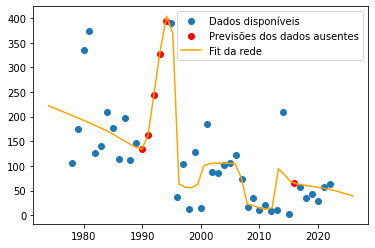

In [94]:
#Previsões
prev_geral =model.predict(anos_com_dados_norm)*pa_std + pa_media
prev_ausentes = model.predict(aspa_normalizado)*pa_std + pa_media

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca_art,label='Dados disponíveis')
f1.scatter(anos_sem_pesca_art,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
p = p.reshape(50,1)
y = model.predict(p)*pa_std + pa_media
f1.plot(p*ano_std + ano_media,y,color='orange',label='Fit da rede')


#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

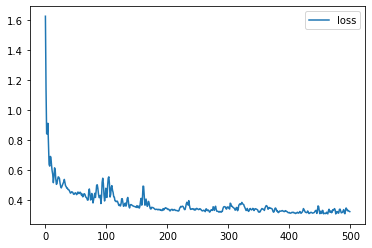

In [95]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()